# Performance Comparison of Models' `Word Error Rate`

In this notebook we compare the WER performance of the models created in Step 1 and 2 of the Domain Specific NeMo ASR application. We compare, in one place, the performance of the pre-trained models and the fine-tuned models across both acoustic and language model workflows. 

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from tools.System.reader import Reader
from tools.misc import parse_manifest_wer, barplot_manifest

# 1. Load project

We first load the project through its `project_id`, in this way we have access to all the information (models, inference, performance, etc.) of the project.

In [2]:
project_id = 'WSJ'
project = Reader.load_manifest(project_id, Reader)

Manifest restored from /raid/datasets/asr/data/manifests/WSJ_manifest.json 



These are the evaluation files in this project that we performed inference with.

In [3]:
inferences_all = list(project.manifest.inference.keys())
inferences_all.sort()
print(inferences_all)

['/raid/datasets/asr/data/example_data/wsj/wsj-eval-92.json']


Given a selected evaluation dataset, these are the models used and their associated results.

The results are structured as follows: For each evaluation dataset, we have a multiple models identified by their `model_id` and inside those we have the model's results.

In [4]:
print(inferences_all[0])
project.manifest.inference[inferences_all[0]]

/raid/datasets/asr/data/example_data/wsj/wsj-eval-92.json


{'am-finetuned-WSJ_train_speed-greedy-decoder': {'wer': 0.044657097288676235,
  'path': '/raid/datasets/asr/data/inferences/WSJ/results-am_grid__wsj-eval-92__am-finetuned-WSJ_train_speed-greedy-decoder.json',
  'lm_wer': None},
 'am-pretrained-greedy-decoder': {'wer': 0.09994683678894205,
  'path': '/raid/datasets/asr/data/inferences/WSJ/results-am_grid__wsj-eval-92__am-pretrained-greedy-decoder.json',
  'lm_wer': None},
 'am-finetuned-WSJ_train_speed--lm-Libri': {'wer': 0.044479886585149744,
  'path': '/raid/datasets/asr/data/inferences/WSJ/results-lm_grid__wsj-eval-92__am-finetuned-WSJ_train_speed--lm-Libri.json',
  'lm_wer': 0.037037037037037035},
 'am-finetuned-WSJ_train_speed--lm-WSJ': {'wer': 0.044657097288676235,
  'path': '/raid/datasets/asr/data/inferences/WSJ/results-lm_grid__wsj-eval-92__am-finetuned-WSJ_train_speed--lm-WSJ.json',
  'lm_wer': 0.02410065567960305}}

# 2. Performace Comparison
Next, we select one evaluation dataset to plot its performance and we also select the performance metric we wish to sort by.

In [5]:
sel_inference = project.manifest.inference[inferences_all[0]]
sort_metric = 'percentWER'

# Note if you wish to plot (and parse) only a specific set of models you can use the argument 'keep' and 
# list the model_id(s) you wish to keep.
df = parse_manifest_wer(sel_inference, sort_metric=sort_metric)
df

,inference_types,lm_wer,wer,percentWER
3,am-finetuned-WSJ_train_speed--lm-WSJ,0.024101,0.044657,2.410066
2,am-finetuned-WSJ_train_speed--lm-Libri,0.037037,0.044480,3.703704
0,am-finetuned-WSJ_train_speed-greedy-decoder,NaN,0.044657,4.465710
1,am-pretrained-greedy-decoder,NaN,0.099947,9.994684


# 3. Perfromance Plot
We use the dataframe created by the `parse_manifest_wer` function to plot the performance of the different models.
We use the function `barplot_manifest` that has the arguments `([dataframe],[metric to plot],[title],[xlabel],[ylabel])`.

Note: WER percent may be above 100% when the number of words in the prediction is larger than the number of words in the reference.

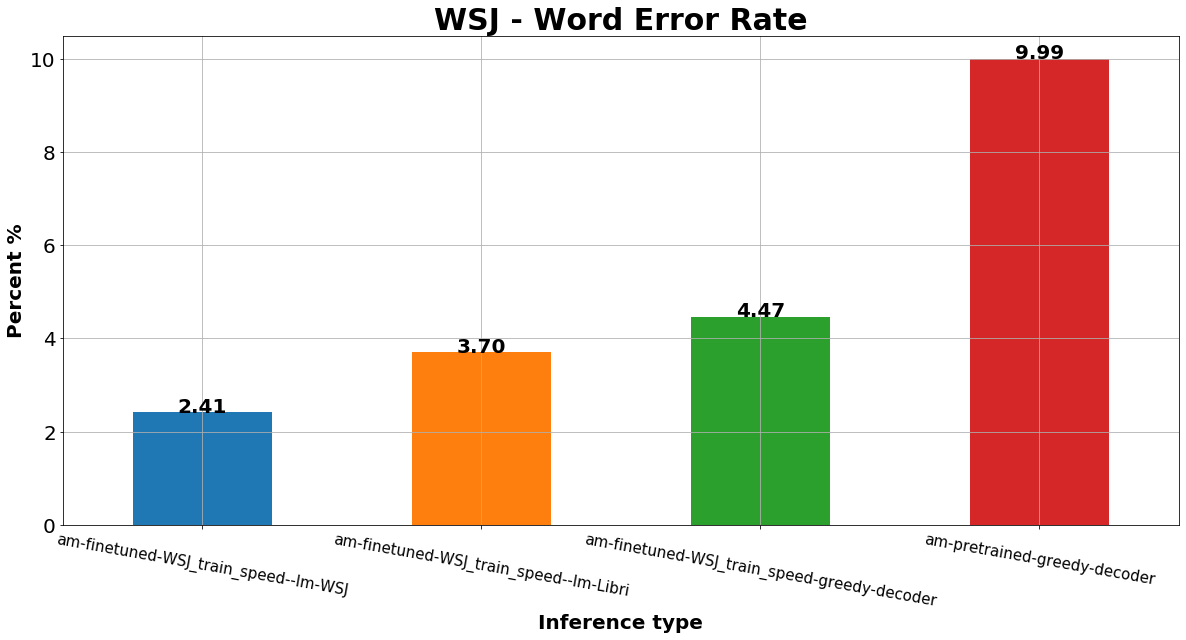

In [6]:
%matplotlib inline
WER = barplot_manifest(df,'percentWER',"WSJ - Word Error Rate", "Inference type","Percent %")

# 4. Performance Improvement 
With each model generated we see the progression in performance. Next, we see the total WER decrease from the pre-trained model to the fine-tuned model.

In [7]:
df.set_index('inference_types', inplace=True)

In [8]:
org = df.loc['am-pretrained-greedy-decoder','wer'] # pre-trained model
new = df.loc['am-finetuned-WSJ_train_speed--lm-WSJ','lm_wer'] # fine-tuned model

In [9]:
per_decrease = 100*((org-new)/org)
print("Decreased WER by {0:.2f}%".format(per_decrease))

Decreased WER by 75.89%
